<h1><center>CSEN1022:Assignment 3</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Omar Tareq El-Sebaey

GUC-ID: 43-11815

Elective Tutorial No.:

**Member 2**

Name: Zeyad Salah Ali

GUC-ID: 43-3532

Elective Tutorial No.:

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Utils

In [2]:
def Load_Data(address: str, count = 5000) -> np.ndarray:
    return np.array([plt.imread(address + str(i) + '.jpg').flatten() for i in range(count)], dtype = np.int64)

In [3]:
def Plot_Data(data: list[np.ndarray], titles: list[str], nrows = 1, ncols = 2, figsize = (30, 10), cmap = 'gray') -> None:
    plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
    
    for i in range(len(data)):
        plt.subplot(nrows, ncols, (i + 1))
        plt.title(titles[i], fontsize = 12, weight = 'bold')
        plt.imshow(data[i], cmap = cmap)

    plt.show()

## Read Data

Training Data: (15000, 3072), Testing Data: (3000, 3072), Training Data Type: int64, Testing Data Type: int64


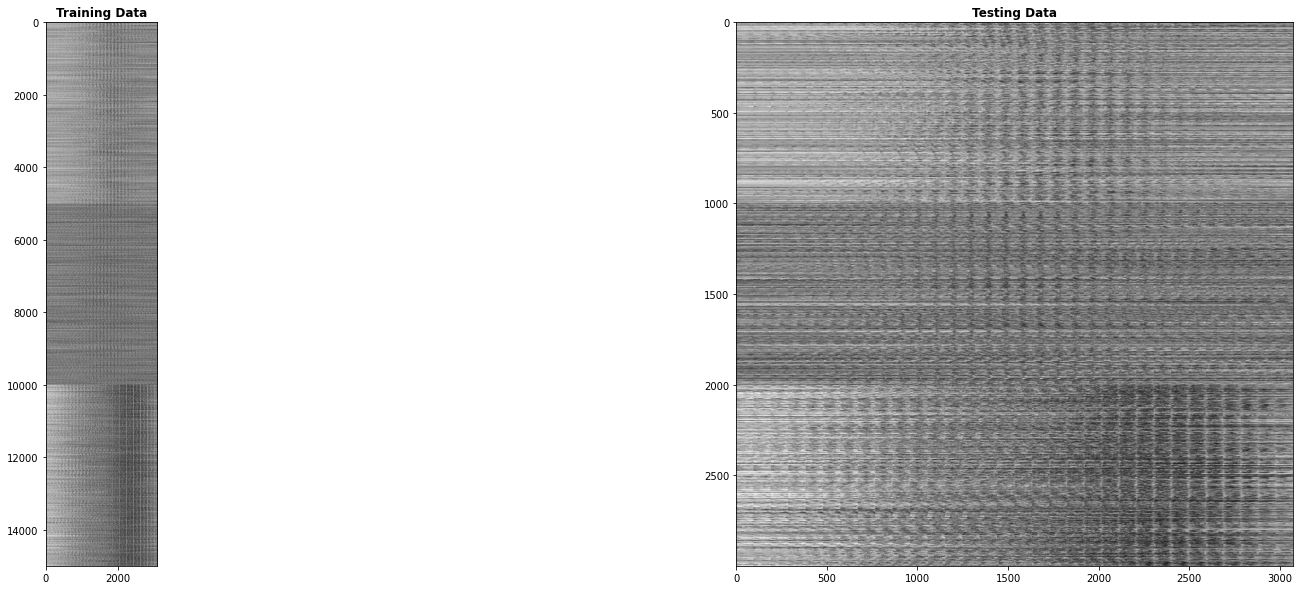

In [4]:
# X_train, X_test
# THE image categories are different.

X_Data = {}

X_Data['Train'] = np.concatenate([Load_Data('Data/train/airplane/'), Load_Data('Data/train/bird/'), Load_Data('Data/train/truck/')])
X_Data['Test'] = np.concatenate([Load_Data('Data/test/airplane/', 1000), Load_Data('Data/test/bird/', 1000), Load_Data('Data/test/truck/', 1000)])

print(f"Training Data: {X_Data['Train'].shape}, Testing Data: {X_Data['Test'].shape}, Training Data Type: {X_Data['Train'].dtype}, Testing Data Type: {X_Data['Test'].dtype}")
Plot_Data([X_Data['Train'], X_Data['Test']], ['Training Data', 'Testing Data'])

<hr style="border:2px solid black"> </hr>

# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

### Initializing The Main Data Structure

In [5]:
X_Data['Random_Centroids']   = np.ndarray((10, 3, 3072), dtype = np.int64)
X_Data['Centroids']          = np.ndarray((10, 3, 3072), dtype = np.int64)
X_Data['Membership_Vectors'] = np.ndarray((10, 15000),   dtype = np.int8)
X_Data['DBIs']               = np.ndarray((10, 1),       dtype = np.float64)

### Picking 3 Random Centroids

In [6]:
for i in range(10):
    X_Data['Random_Centroids'][i] = X_Data['Train'][np.random.choice(X_Data['Train'][0], size = 3)]

In [7]:
def Calculate_Membership_Vector(centroids: np.ndarray, data: np.ndarray) -> np.array:
    distances_0 = np.sqrt(np.square(data - centroids[0]).sum(axis = 1))
    distances_1 = np.sqrt(np.square(data - centroids[1]).sum(axis = 1))
    distances_2 = np.sqrt(np.square(data - centroids[2]).sum(axis = 1))

    return np.argmin(np.concatenate([distances_0, distances_1, distances_2]).reshape(3, -1), axis = 0)

In [8]:
def Calculate_Centroids(centroids: np.ndarray, data: np.ndarray) -> tuple[np.ndarray, np.array]:
    membership_vector = Calculate_Membership_Vector(centroids, data)

    new_centroids     = np.ndarray((3, len(data[0])), dtype = np.int64)
    new_centroids[0]  = np.mean(data[membership_vector == 0], axis = 0, dtype = np.int64)
    new_centroids[1]  = np.mean(data[membership_vector == 1], axis = 0, dtype = np.int64)
    new_centroids[2]  = np.mean(data[membership_vector == 2], axis = 0, dtype = np.int64)

    return (new_centroids, membership_vector) if np.array_equal(new_centroids, centroids) else Calculate_Centroids(new_centroids, data)

In [9]:
def Calculate_DBI(centroids: np.ndarray, data: np.ndarray, membership_vector: np.array) -> float:
    m_01 = np.sqrt(np.square(centroids[0] - centroids[1]).sum())
    m_02 = np.sqrt(np.square(centroids[0] - centroids[2]).sum())
    m_12 = np.sqrt(np.square(centroids[1] - centroids[2]).sum())

    cluster_0 = data[membership_vector == 0]
    cluster_1 = data[membership_vector == 1]
    cluster_2 = data[membership_vector == 2]

    s_0 = np.mean(np.sqrt(np.square(cluster_0 - centroids[0]).sum(axis = 1)).flatten())
    s_1 = np.mean(np.sqrt(np.square(cluster_1 - centroids[1]).sum(axis = 1)).flatten())
    s_2 = np.mean(np.sqrt(np.square(cluster_2 - centroids[2]).sum(axis = 1)).flatten())

    return np.max([(s_0 + s_1) / m_01, (s_0 + s_2) / m_02, (s_1 + s_2) / m_12])

In [10]:
for i in range(10):
    X_Data['Centroids'][i], X_Data['Membership_Vectors'][i] = Calculate_Centroids(X_Data['Random_Centroids'][i], X_Data['Train'])
    X_Data['DBIs'][i] = Calculate_DBI(X_Data['Centroids'][i], X_Data['Train'], X_Data['Membership_Vectors'][i])

<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [11]:
def Calculate_Predictors(centroids: np.ndarray, membership_vector: np.array, data: np.ndarray) -> tuple[np.ndarray, np.array]:
    cluster_1 = [len(data[:5000][membership_vector[:5000] == 0]), len(data[:5000][membership_vector[:5000] == 1]), len(data[:5000][membership_vector[:5000] == 2])] 
    cluster_2 = [len(data[5000:10000][membership_vector[5000:10000] == 0]), len(data[5000:10000][membership_vector[5000:10000] == 1]), len(data[5000:10000][membership_vector[5000:10000] == 2])]
    cluster_3 = [len(data[10000:][membership_vector[10000:] == 0]), len(data[10000:][membership_vector[10000:] == 1]), len(data[10000:][membership_vector[10000:] == 2])]

    airplane_cluster_index = np.argmax([cluster_1])
    bird_cluster_index     = np.argmax([cluster_2])
    truck_cluster_index    = np.argmax([cluster_3])

    return (np.concatenate([centroids[airplane_cluster_index], centroids[bird_cluster_index], centroids[truck_cluster_index]]).reshape(3, -1), 
                           np.array([cluster_1[airplane_cluster_index], cluster_2[bird_cluster_index], cluster_3[truck_cluster_index]]))

In [12]:
best_dbi               = np.argmin(X_Data['DBIs'])
best_centroids         = X_Data['Centroids'][best_dbi]
best_membership_matrix = X_Data['Membership_Vectors'][best_dbi]     # It's a vector

predictors, counts = Calculate_Predictors(best_centroids, best_membership_matrix, X_Data['Train'])
tmv = Calculate_Membership_Vector(predictors, X_Data['Test'])

max_counts = counts
confusion_matrix = np.array([
                            [len(X_Data['Test'][: 1000][tmv[: 1000] == 0]      ), len(X_Data['Test'][: 1000][tmv[: 1000] == 1]      ), len(X_Data['Test'][: 1000][tmv[: 1000] == 2]       )], 
                            [len(X_Data['Test'][1000:2000][tmv[1000:2000] == 0]), len(X_Data['Test'][1000:2000][tmv[1000:2000] == 1]), len(X_Data['Test'][1000:2000][tmv[1000: 2000] == 2])], 
                            [len(X_Data['Test'][2000:][tmv[2000:] == 0]        ), len(X_Data['Test'][2000:][tmv[2000:] == 1]        ), len(X_Data['Test'][2000:][tmv[2000:] == 2]         )]
                            ])

<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

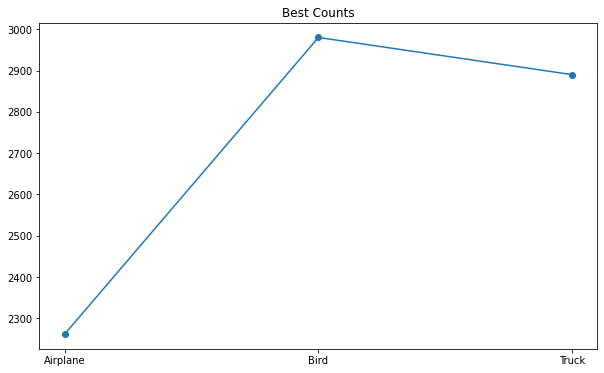

In [13]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

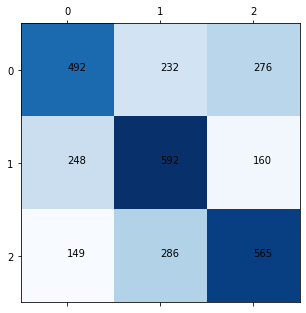

In [14]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))